## Introduction to Bayes Theorem

Let's say we have a measurement of some random variable $x$, and this measurement behaves like a Gaussian at zero mean and $\sigma=1$.

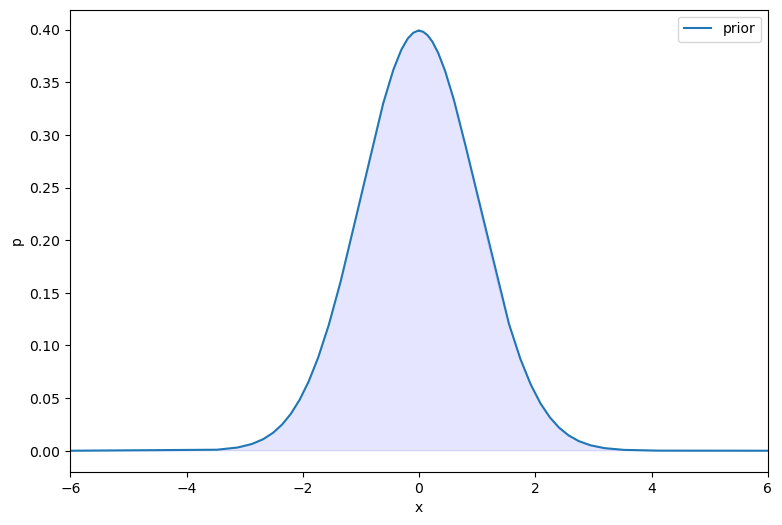

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

# Measurement probability
def gaus(mu=0,sigma=1): 
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

# Plot of what we expect the measurement to be
def plotgaus():
    x,y=gaus(0,1)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y, label='prior')
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.legend()
    plt.show()

plotgaus()


This example is known as the <b>prior distribution</b>, i.e., a preconceived distribution predicting how the probability of our measurement will behave.
    
Let's say we conduct this measurement, but our observed value is not actually at the mean we expected to be (and it is not even close!). Let's say our measurement gave $x=2$. What would be the likelihood of this occurring or not occurring?

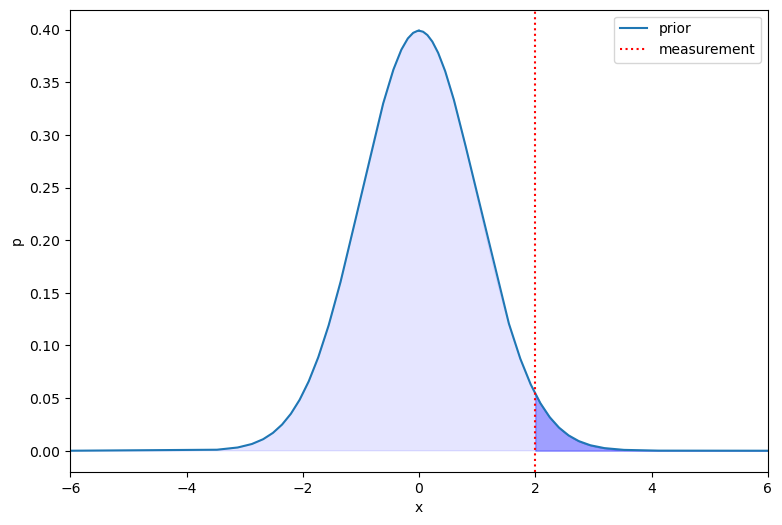

In [32]:
def gaus(mu=0,sigma=1,meas=2):
    
    # range of x for the prior distribution
    x = np.arange(-10, 10, 0.001)
    # prior distribution at mean mu
    y = stats.norm.pdf(x,mu,sigma)
    
    # range of x for the measurement
    xmeas = np.arange(meas, 10, 0.001)
    # measurement distribution
    ymeas = stats.norm.pdf(xmeas,mu,sigma)
    return x,y,xmeas,ymeas

def plotgaus():
    x,y,xmeas,ymeas=gaus(0,1,2)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y, label='prior')
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.fill_between(xmeas,ymeas,0, alpha=0.3, color='b')
    plt.axvline(x=2,color='r',ls=':',label='measurement')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.legend()
    plt.show()

plotgaus()

The measurement at $x=2$ is very far from the mean of the prior distribution, i.e., it deviates considerably from what we expected to observe, therefore, it has a very low probability. The key question now is:

*Is this deviation just a statistical fluctuation, or does this indicate that there is something wrong with our expectation, i.e., our assumed prior was wrong?*

Imagine that we perform this measurement 10 times and they keep defying our expectations. Then we increase the number of experiments to 1000.

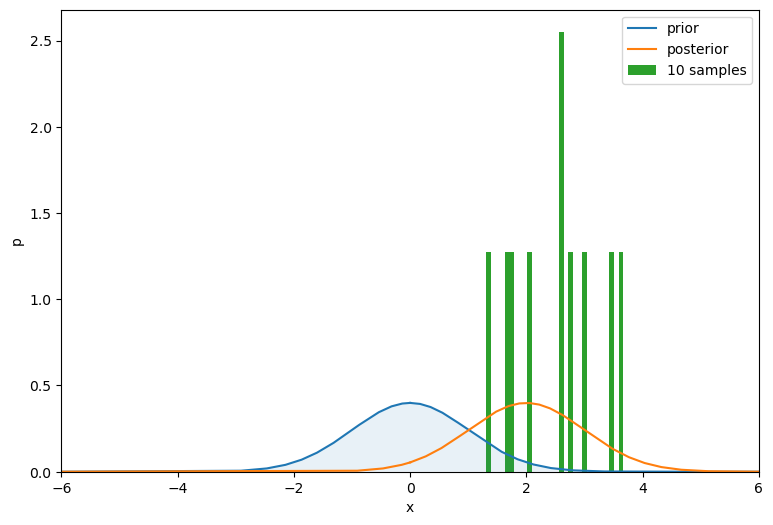

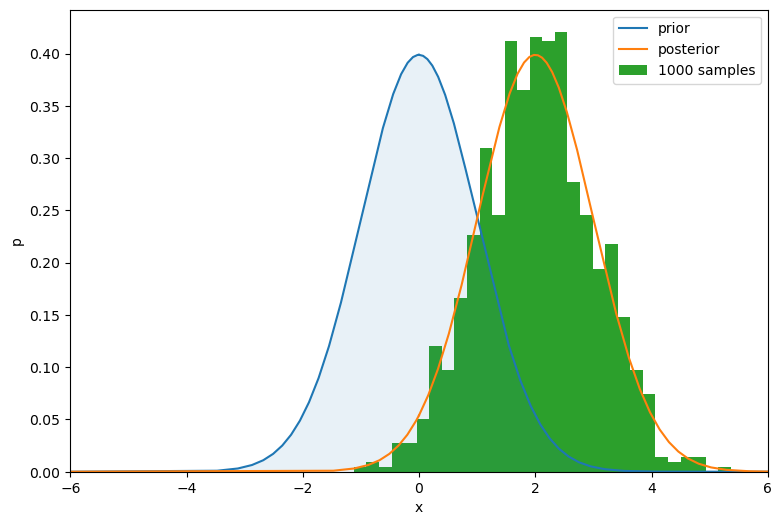

In [35]:
np.random.seed(32)

def gaus(mu=0,sigma=1): 
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

def plotGausSample(iZ,iSample):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #sample
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    #
    xs,ys=gaus(0,1)
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    count, bins, ignored = plt.hist(samples, 30, density=True, label=str(iSample)+' samples')
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()

# Calling to plot the idealized experiment 10 times
plotGausSample(2,10)
# Calling to plot the idealized experiment 1000 times
plotGausSample(2,1000)


The orange curve is the <b>posterior distribution</b> that defies our original expectation. Note that this distribution (unknown a priori) was used to simulate the measurement and generate the sample data for the sake of this prior/posterior illustration.

When we have access to few measurement events, we have an indication that our *prior* distribution is wrong, but the shape of the *posterior* distribution is not yet clear.

As we acquire more measurements, we see that the *posterior* distribution clearly deviates from the expected distribution. Moreover, the shape of the measured distribution is much clearer. With both of these samples, we are starting to see that our initial hypothesis was not correct and we need to adjust the expectation for the probability distribution.

However, we could take a more positive approach regarding our *prior*; we could say that our *prior* is actually right, and our measured sample is biased. There are many more events in reality and the sample just represents a subset. Therefore, which approach to choose?

## Bayes'  Theorem

Bayes' theorem is fundamental in probability theory and statistics that allows us to update our beliefs or assess the probability of an event occurring based on new evidence or data.

\begin{equation}
P(A|B) = \frac{P(B|A)\, P(A)}{P(B)}
\end{equation}

- $P(A∣B)$ represents the probability of event A occurring given that event B is `true`, also known as the <ins>posterior probability</ins>, as it represents our updated belief about event A after considering the evidence from event B.

- $P(A)$ is the probability of event A happening before considering any new evidence, known as the <ins>prior probability</ins> of A. It represents our initial belief or knowledge about the likelihood of event A occurring.

- $P(B∣A)$ represents the probability of event B occurring given that event A is `true`, also known as the <ins>likelihood</ins> and quantifies how well event A explains or predicts event B.

- $P(B)$ is the probability of event B occurring, regardless of whether event A is true or not. It serves as a normalizing factor, ensuring that the probabilities are properly scaled.

In some cases, Bayes' theorem is re-written as:

\begin{equation}
P(H|E) = \frac{P(E|H)\, P(H)}{P(E)}
\end{equation}

with $H\equiv$ hypothesis and $E\equiv$ evidence, or

\begin{equation}
P(M|D) = \frac{P(D|M)\, P(M)}{P(D)}
\end{equation}

with $M\equiv$ model and $D\equiv$ data.

In practice, the denominator of Bayes' theorem is often treated as a normalization factor, the theorem can also be written as a proportionality relation as

\begin{equation}
P(M|D)\propto P(D|M)\, P(M)
\end{equation}

## Frequentist vs. Bayesian Picture

<b>The coin example</b>

(Case #1) Consider that we are not sure whether a coin is fair or not. We denote the probabilities of heads and tails as $p_h$ and $p_t$, respectively. Suppose we flip the coin 20 times and obtain heads 15 times.

<b>Frequentist Picture</b>

This analysis focuses on the observed data.

In [40]:
# probability of obtaining heads
ph_freq = 15/20
print(ph_freq)

0.75


According with the frequentist, 75% of the events result in heads, therefore, the coin is biased towards heads (unfair coin).

<b>Bayesian Picture</b>

In the Bayesian picture, probabilities are treated as <ins>random variables</ins> and prior beliefs/hypotheses are incorporated into the analysis. Just as in the frequentist case, let's take as the parameter of interest, the probability of heads, $p_h=P(h)$. The latter is treated as a random variable and can assume any value between 0 and 1.

Because $p_h$ is a random variable, we need to assign a `prior probability` distribution (model or hypothesis) to describe its "spread", which we denote $P(M)\equiv P(p_h)$ and our assumption is that all values of $p_h$ are equally likely (the coin can be fair or unfair).

By applying the Bayes' theorem, we have the opportunity to update our beliefs based on the evidence or observed data. The `posterior probability` distribution of $p_h$ given the data $D$, $P(p_h|D)$, is proportional to $P(p_h)$ and the likelihood of the data given $p_h$, $P(D|p_h)$,

\begin{equation}
P(p_h|D) \propto P(D|p_h) P(p_h).
\end{equation}

The likelihood is expected to follow a binomial distribution representing the probability of $m$ heads out of $N$ total flips with $p_h$ the probability of getting heads and $(1-p_h)$ the probability of getting tails. This will give

\begin{equation}
P(p_h|D) \propto \frac{N!}{m!(N-m)!} p_h^m \,(1-p_h)^{N-m}
\end{equation}

which means that the `posterior probability` distribution describes the range (and how probable) the values of $p_h$ are based on `prior` belief and data. By analyzing this distribution, we can identify which value of $p_h$ is the most probable and we can also get the uncertainty associated with $p_h$.

In [43]:
def binomial_with_uniform_prior(p,N,m):
    '''Binomial with uniform model'''
    return math.comb(N,m)*np.power(p,m)*np.power(1-p,N-m)

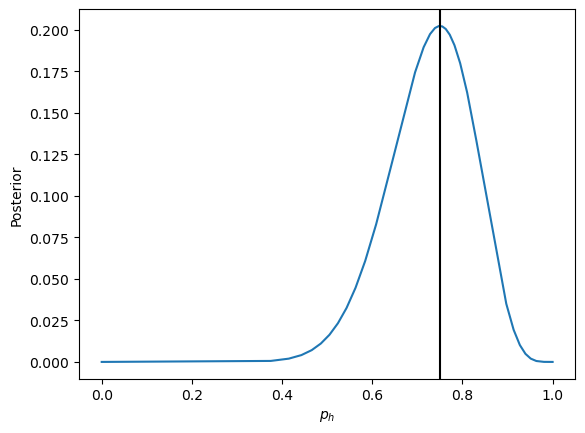

Best ph:  0.75


In [45]:
N = 20
m = 15
ph = np.arange(0,1,.0001)
posterior = binomial_with_uniform_prior(ph,N,m)     # calculating P(ph|D)
plt.plot(ph,posterior)


best_ph = ph[np.argmax(posterior)]     # getting the value of ph where P(ph|D) is maximized
plt.axvline(best_ph,c='k')            # plotting the vertical line at ph where P(ph|D) is maximized
plt.xlabel("$p_h$")
plt.ylabel("Posterior")
plt.show()
print('Best ph: ', round(best_ph,3))

Note how the uncertainty in $p_h$ changes with the total number of events. Let's see a case in which the `posterior` is for a significant number of events $N=100$ and heads was observed 75 times being contrasted with a case with poor amount of data of $N=4$ and heads occurred 3 times.

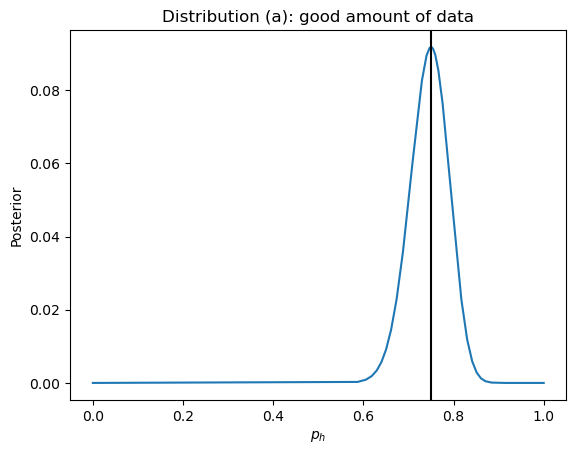

Best ph:  0.75


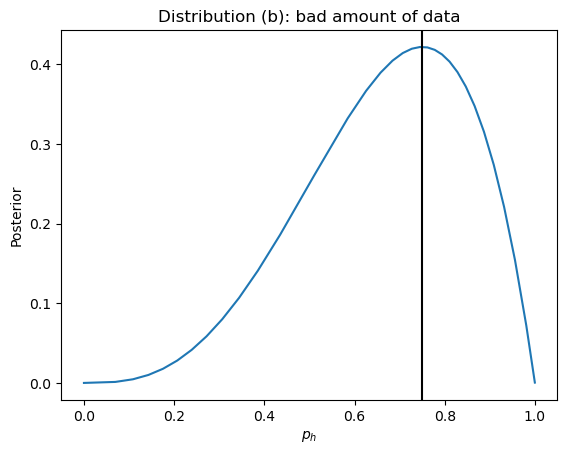

Best ph:  0.75


In [48]:
N = 100
m = 75
ph = np.arange(0,1,.0001)
posterior = binomial_with_uniform_prior(ph,N,m)     # calculating P(ph|D)
plt.plot(ph,posterior)

best_ph = ph[np.argmax(posterior)]     # getting the value of ph where P(ph|D) is maximized
plt.title('Distribution (a): good amount of data')
plt.axvline(best_ph,c='k')              # plotting the vertical line at ph where P(ph|D) is maximized
plt.xlabel("$p_h$")
plt.ylabel("Posterior")
plt.show()
print('Best ph: ', round(best_ph,3))

N = 4
m = 3
ph = np.arange(0,1,.0001)
posterior = binomial_with_uniform_prior(ph,N,m)     # calculating P(ph|D)
plt.plot(ph,posterior)

best_ph = ph[np.argmax(posterior)]     # getting the value of ph where P(ph|D) is maximized
plt.title('Distribution (b): bad amount of data')
plt.axvline(best_ph,c='k')              # plotting the vertical line at ph where P(ph|D) is maximized
plt.xlabel("$p_h$")
plt.ylabel("Posterior")
plt.show()
print('Best ph: ', round(best_ph,3))

(Case #2) Let's consider now a case in which we are almost 100% sure that the coin is fair; for instance, let's say we are 99% confident that we are dealing with a regular coin that has equal probabilities for heads and tails. In this case, we can model our `prior probability` distribution as a Gaussian with mean $\mu=p_h=0.5$ and a small standard deviation of $\sigma = 0.01$. This examples requires us to re-write our `prior` with a new model given by

\begin{equation}
P(p_h) = 0.99\,\mathcal{N}(\mu=0.5,\sigma=0.01) + 0.01
\end{equation}

and this model carries a normal distribution weighted by 0.99 plus a constant of 0.01 that accounts for 1% chance that the coin could be unfair.

The equation above is the new model for the `prior distribution`. The likelihood of the data given $p_h$, $P(D|p_h)$, continues to follow a binomial distribution representing the probability of $m$ heads out of $N$ total flips with $p_h$ the probability of getting heads and $(1-p_h)$ the probability of getting tails.

In [51]:
def new_prior_func(p,N,m):
    prior = 0.99 / (0.01 * np.sqrt(2*np.pi)) * np.exp(-(p-0.5)**2/(2*0.01**2))+0.01
    return prior*binomial_with_uniform_prior(p,N,m)

Using the new `prior probability` above, we will analyze the `posterior probability` for the cases where:

a) $N=20$, $m=15$ (original outcome)

b) $N=4$, $m=3$ (bad data availability)

c) $N=100$, $m=75$ (good data availability)

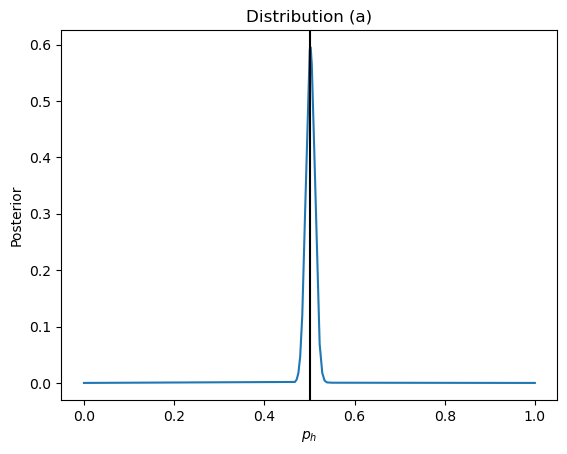

Best ph:  0.502


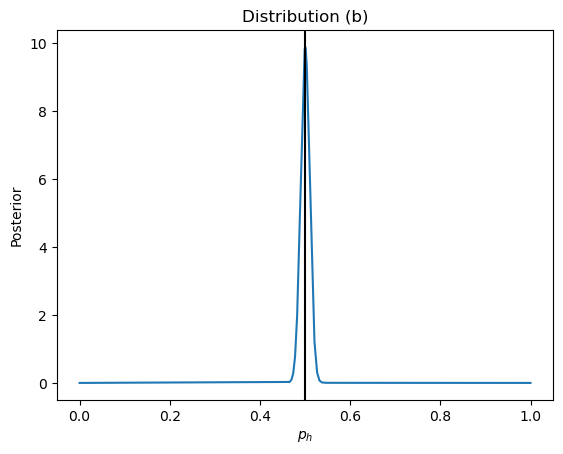

Best ph:  0.5


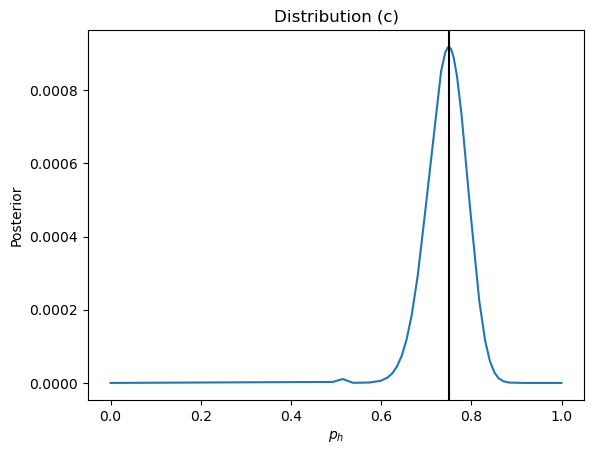

Best ph:  0.75


In [54]:

N = 20
m = 15
ph = np.arange(0,1,.0001)
posterior = new_prior_func(ph,N,m)     # calculating P(p|D)
plt.plot(ph,posterior)


best_ph = ph[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
plt.title('Distribution (a)')
plt.axvline(best_ph,c='k')              # plotting the vertical line at p where P(p|D) is maximized
plt.xlabel('$p_h$')
plt.ylabel('Posterior')
plt.show()
print('Best ph: ', round(best_ph,3))

N = 4
m = 3
ph = np.arange(0,1,.0001)
posterior = new_prior_func(ph,N,m)     # calculating P(p|D)
plt.plot(ph,posterior)


best_ph = ph[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
plt.title('Distribution (b)')
plt.axvline(best_ph,c='k')              # plotting the vertical line at p where P(p|D) is maximized
plt.xlabel('$p_h$')
plt.ylabel('Posterior')
plt.show()
print('Best ph: ', round(best_ph,3))

N = 100
m = 75
ph = np.arange(0,1,.0001)
posterior = new_prior_func(ph,N,m)     # calculating P(p|D)
plt.plot(ph,posterior)


best_ph = ph[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
plt.title('Distribution (c)')
plt.axvline(best_ph,c='k')              # plotting the vertical line at p where P(p|D) is maximized
plt.xlabel('$p_h$')
plt.ylabel('Posterior')
plt.show()
print('Best ph: ', round(best_ph,3))

The `posterior` changed as more data (information) is incorporated into the model! Initially, when not so much data was available, the `posterior` was biased by our assumption of a "fair" coin, i.e., our `prior` modelled as a  Gaussian centered at $p_h=0.5$ and a narrow standard deviation of $\sigma=0.01$ highly influenced the `posterior` outcome with `posterior`$\approx 0.5$. To recover the frequentist prediction of an unfair coin ($p_h=0.75$), we need more data so that the influence of the `prior`can be hindered and the outcome of the `posterior`is more impacted by the data (evidence).

## The log-likelihood test

It is a test that allows us to compare two ditributions by computing the likelihood of each and take their ratio. It is a hypothesis test that helps choosing the "best" model between two nested models. "Nested models" means that one model can be a special case of the other. The best model is the one that makes the data most likely to be explained by that model (or maximizes the likelihood). The likelihood ratio (LR) is defined as 

\begin{eqnarray}
\lambda_{LR} &=& -2 \log\left( \frac{\mathcal{L}_0(\theta_{H_0})}{\mathcal{L}_a(\theta_{ML})} \right) = \\
     &=& -2\left\{ \log[\mathcal{L}_0 (\theta_{H_0})] - \log[\mathcal{L}_a(\theta_{ML})] \right\}
\end{eqnarray}

where $\mathcal{L}_0$ is the likelihood associated with the null hypothesis in which certain parameters in the model may be constrained at $\theta_{H_0}$ to sustain the hypothesis and $\mathcal{L}_a$ is the likelihood associated with the alternative hypothesis in which parameters can vary so that the alternative likelihood can be determined from the parameters that maximize the likelihood of the model to fit the data, $\theta_{ML}$, also known as the <ins>best fit</ins> value for the alternative. Likelihoods in this context are the probabilities that our hypothesized functions match the data. The likelihood function essentially quantifies the probability of observing the given data under the assumption that the parameters have specific values.


By calculating the difference in $\lambda_{LR}$, we can establish if there is significant difference between the `log-likelihood-null` and the `log-likelihood-alternative`. The test basically compares the fit of two models. The null hypothesis can be defined by a smaller/simpler model being the "best" and that is rejected when the test statistic quantity is sufficiently large. If the null hypothesis is rejected, then the larger/alternative model characterizes a significant improvement over the smaller one.

The test itself is done considering the Wilks' theorem that allows us to write that

<b>If $H_0$ is `TRUE`, $\lambda_{LR} \sim \chi_q^2$ in which $\chi_q^2$ is the chi-square distribution with $q$ degrees of freedom corresponding to the difference in the number of parameters that are fit in the null and alternative hypotheses.</b>

The test consists of checking how small $\lambda_{LR}$ or check if $\lambda_{LR}$ fits a $\chi_q^2$ distribution. If these are evidenced, than we fail to reject $H_0$. Otherwise, we fail to reject $H_a$. The test itself will be illustrated with an example below.

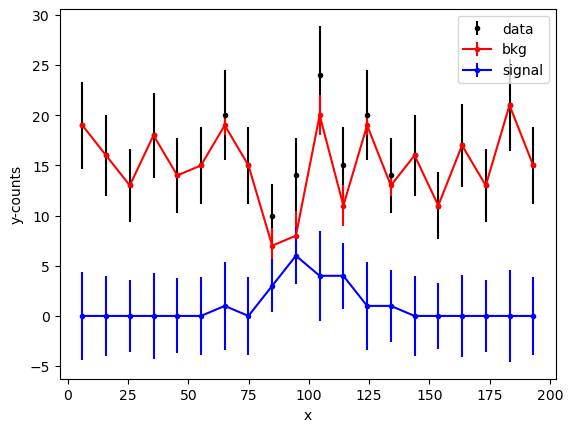

In [69]:
## Let's create some data
np.random.seed(42)

#First let's make a data sample and fit it
bkg = np.random.uniform(0,200, 300)
sig = np.random.normal (100,15,200) #choose different options for the number of signal events
#sig = np.random.normal (100,15,20) #if we reduce the number of samples, the signal will get less pronounced
#sig = np.random.normal (100,15,35) #if we reduce the number of samples, the signal will get less pronounced
data = np.append(sig,bkg)
y, bin_edges = np.histogram(data, bins=20)
ys, bin_edges = np.histogram(sig, bins=bin_edges)
yb, bin_edges = np.histogram(bkg, bins=bin_edges)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, y,yerr= y**0.5,marker='.',linestyle = 'None', color = 'black',label='data')
plt.errorbar(bin_centers,yb,yerr=ys**0.5,marker='.',linestyle = '-', color = 'red',label='bkg')
plt.errorbar(bin_centers,ys,yerr=yb**0.5,marker='.',linestyle = '-', color = 'blue',label='signal')
plt.legend()
plt.xlabel("x")
plt.ylabel("y-counts")
plt.show()


We wish to quantify the significance of an excess on top of a background. We will now define two fit functions that will be our two models for comparison:

- <b>$H_0$:</b> The fit function consists of a flat background with a signal.

\begin{equation}
f_0(x|A,C,\mu,\sigma) = C + A\,\mathcal{N}(x,\mu,\sigma)
\end{equation}

with $A$, $C$, $\mu$, and $\sigma$ being parameters to be fitted.

- <b>$H_a$:</b> The fit function consists of a flat background (no signal).

\begin{equation}
f_a(x|C) = C
\end{equation}

For each of these models, we can write the likelihood by summing over all $N$ bins with value $x_i$ and counts (number of events) $y_i$ and the associated error on the counts is treated as independent events with a uncertainty of $\delta y_i = \sqrt{y_i}$. 

We can write the log-likelihood for the whole dataset as

\begin{equation}
\mathcal{L}(\theta_i|x_i,y_i) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi (\delta y_i)^2}} \exp\left\{-\sum_{i=1}^N \frac{(y_i-f(x_i|\theta_i))^2}{2(\delta y_i)^2}   \right\}
\end{equation}


\begin{equation}
\log(\mathcal{L}(\theta_i|x_i,y_i)) = -\sum_{i=1}^N \log(2\pi (\delta y_i)^2) - \sum_{i=1}^N \frac{(y_i-f(x_i|\theta_i))^2}{2(\delta y_i)^2}   
\end{equation}

Our log-likelihood ratio is then just the difference between the two log-likelihoods where we replace $f(x)$ with the appropriate hypothesis. We will then have

\begin{equation}
\lambda_{LR} = \sum_{i=1}^N \frac{(y_i-f_0(x_i|\theta_i))^2}{(\delta y_i)^2} - \sum_{i=1}^N \frac{(y_i-f_a(x_i|\theta_i))^2}{(\delta y_i)^2}   
\end{equation}

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 382
    # data points      = 20
    # variables        = 3
    chi-square         = 95.2912555
    reduced chi-square = 5.60536797
    Akaike info crit   = 37.2241155
    Bayesian info crit = 40.2113123
[[Variables]]
    c:      15.3751977 +/- 36.4179051 (236.86%) (init = 1)
    mu:     100 (fixed)
    sigma:  18.6458490 +/- 620.133693 (3325.85%) (init = 10)
    amp:    171.231927 +/- 5529.96030 (3229.51%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amp) = +0.7684
    C(c, amp)     = -0.6787
    C(c, sigma)   = -0.4633


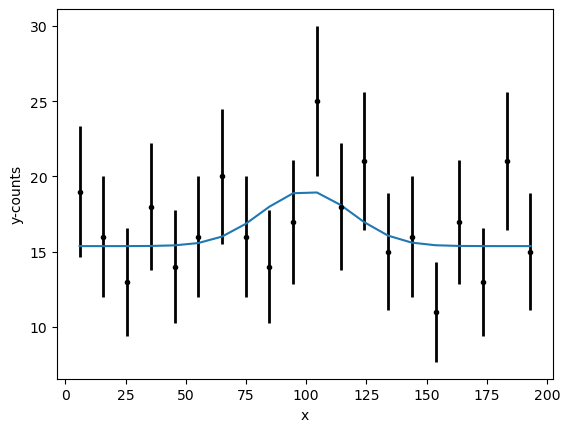

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 27
    # data points      = 20
    # variables        = 3
    chi-square         = 95.7118901
    reduced chi-square = 5.63011118
    Akaike info crit   = 37.3122052
    Bayesian info crit = 40.2994020
##  Warning: uncertainties could not be estimated:
    sigma:  at initial value
    amp:    at initial value
[[Variables]]
    c:      16.1603827 (init = 1)
    mu:     100 (fixed)
    sigma: 10.00000000 (init = 10)
    amp:    20.0000000 (init = 20)


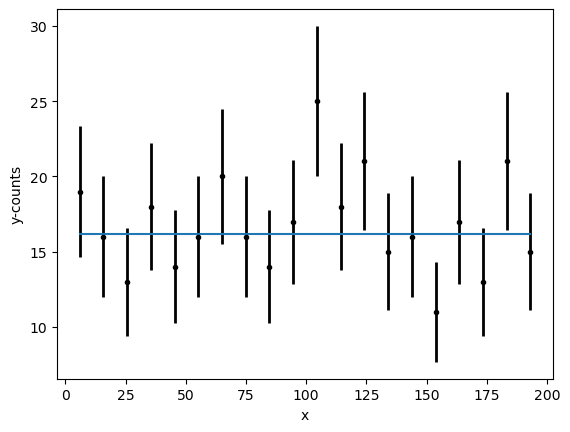

Delta negative log-likelihood (ratio): 0.841269188192598
chi2val probability associated with the ratio: 0.328314997026891
probability of this delta log likelihood happening by case or by a fluctuation: 0.6566299940537821
 
alpha = 0.1
alpha = 0.1 pvalue: 0.6566299940537821
Null hypothesis: both models perform equally
pvalue > alpha: then fail to reject H0


alpha = 0.1
Null hypothesis: both models perform equally
chi2 critical: 4.605170185988092 log likelihood value: 0.841269188192598
log likelihood is less equal than chi2 critical: then fail to reject H0


In [65]:
from scipy.stats import norm
import lmfit

def fNull(params,x):
    '''function of the null hypothesis'''
    val = norm.pdf(x,params["mu"],params["sigma"])
    return params["amp"]*val + params["c"]

def fAlt(params,x):
    '''function of the alternative hypothesis'''
    return params["c"]*(x+1)/(x+1) #hack to output array

def binnedLikelihood(params, x, ydata, weights, func):
    '''function that obtains the likelihood'''
    y_model= func(params,x)
    
    # Because we will use lmfit.minimize, we need to take the minus of the likelihood
    # to minimize it (not maximize it)
    # And minimize in lmfit takes the square root of the objective function to be minimized, in this case,
    # the negative of the likelihood
    residarr = np.sqrt(((y_model - ydata)/(2*weights))**2 + np.log(2*np.pi*weights**2))
    return residarr

def fitData(iX,iY,iFunc,iPlot=False):
    '''function to fit the model to the data to determine parameters'''
    # Note that for the case of the flat model, lmfit already ignores the parameters that are not part of the model
    # and will not fluctuate them.
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params["mu"].vary = False #if we wish to fix parameters
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    lmfit.report_fit(result)
    if iPlot:
        #Now we plot it. 
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("y-counts")
        plt.show()
        
    # After fitting, the function returns the residuals for each point
    # From the manual: residual method returns a residual array resid_i. Return value of the objective function when using the best-fit 
    # values of the parameters.
    return result.residual

def deltaNLL(x,y,iPlot=False):
    '''function to compute the log likelihood ratio also denoted as delta negative log-likelihood'''
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    # If you wish to see the individual contributions for the log-likelihood, uncomment the lines below.
    #print(np.sum(LLNull))
    #print(np.sum(LLAlt))
    # remember that we minimized a minus function, so then the signs in this difference have to account for that.
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))

x=bin_centers
NLL = deltaNLL(x,y,True)
# this is the likelihood ratio
print("Delta negative log-likelihood (ratio):",NLL)

# we can compute the probability of NLL from a chi2-distribution with 3 degrees of freedom
# 4 floating parameters in the null - 1 floating parameter in the alternative = 3 degrees of freedom
# if mu is fixed, ddof = 2
ddof = 2
chi2val=stats.chi2.pdf(NLL, ddof)
print("chi2val probability associated with the ratio:",chi2val)

# Computing the p-value for at least that delta log likelihood (ratio) to occur
# This is obtained with an upper-tailed test p-value = 1 - CDF(ratio,ddof)
probability = 1 - stats.chi2.cdf(NLL,ddof)
print("probability of this delta log likelihood happening by case or by a fluctuation:",probability)
print(" ")
# critical value given a significance level alpha
#alpha = 0.68
alpha = 0.1
#alpha = 0.05
print("alpha =", alpha)

# chi2c is the critical chi2 value, taken from a chi2 distribution at the alpha percent point function (one-tailed)
chi2c = stats.chi2.ppf(1-alpha, df=ddof)

# This was too complicated. Removed for now.
# the chi2 value associated with the pvalue of the hypothesis test conducted above
#chi2_pvalue = stats.chi2.ppf(1 - stats.chi2.cdf(NLL,ddof), df=ddof)
# ppf inverts the information, it takes the probability and converts into the random variable value
#chi2_pvalue = stats.chi2.ppf(probability, df=ddof)
#print("chi2 critical:", chi2c, "chi2 (pvalue):",chi2_pvalue)
#if chi2_pvalue >= chi2c:
#    print("chi2 (pvalue) is greater equal than chi2 critical: ")
#else:
#    print("chi2 (pvalue) is less than chi2 critical: then fail to reject H0")

# We can compare the p-value associated with the log likelihood with the significance level alpha
print("alpha =", alpha, "pvalue:", probability)
print("Null hypothesis: both models perform equally")
if probability > alpha:
    print("pvalue > alpha: then fail to reject H0")
else:
    print("pvalue < alpha: then reject H0")


print("\n")
# We could also compare directly the chi2 critical with NLL
print("alpha =", alpha)
print("Null hypothesis: both models perform equally")
print("chi2 critical:", chi2c, "log likelihood value:",NLL)
if NLL > chi2c:
    print("log likelihood is greater than chi2 critical: then reject H0")
else:
    print("log likelihood is less equal than chi2 critical: then fail to reject H0")



The delta log-likelihood provides a measure of how much the data favors one model over another, and this information can be used to compute the probability of the chi-square value, which in turn provides a measure of how well the favored model fits the data.

If the delta log-likelihood value is greater than what is expected from the appropriate chi-square distribution, it most likely means that the data is not well described by the model being tested (the alternative).

A small p-value indicates that the chi-square value (or equivalently the delta log likelihood) is unlikely to have arisen by chance. In the example above with $\mu$ constrained and 2 degrees of freedom, the large delta log-likelihood value has a vanishingly small chance of happening when there are only 2 degrees of freedom. In this example, the bump was clearly visible, the assumption of just a flat background fails. We have 99.999\% confidence that the flat distribution is not the best model because a large delta log likelihood indicates that the `-log likelihood` of the null hypothesis (with the Gaussian bump) was efficiently minimized, but not the alternative hypothesis which still results in a significant amount of `-log likelihood`. <b>In other words, we are quite confident that there is a bump in the data or that there is a fluctuation from the flat background.</b>

<b>Change the dataset above by decreasing the influence of the signal bumb (some options are already commented in the data creation).</b>
A large p-value indicates that the chi-square value (or equivalently the delta log-likelihood) is likely to have arisen by chance. In the example above with $\mu$ constrained and 2 degrees of freedom and data `sig = np.random.normal (100,15,35)`, the small delta log-likelihood value has a significant chance of happening when there are only 2 degrees of freedom. In this example, the bump was NOT clearly visible, the assumption of just a flat background is not that bad. We see that the delta log-likelihood is very small and has a significant probability of happening by chance. So, fitting a flat background with and without a bump gives resonably similar fits.

<b>Another way of visualizing the decision of the test:</b> if the `lambda computed` is much smaller than the `critical chi2 value`, most likely the data is not well described by the alternative model and we fail to reject the null hypothesis. If `lambda computed` starts to get comparable with the `critical chi2 value` (given a significance level of `alpha`), then it may be that we are not so confident with the null hypothesis and we may need to reject it. However, note that such test decisions cannot be so "rigid" when applied in this context of model analysis.

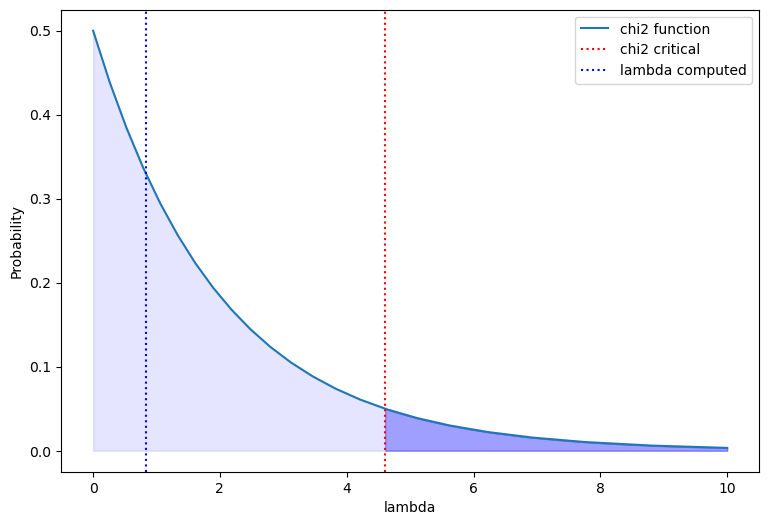

In [67]:
def chi2_func(chi2c,ddof):
    
    # range of x for the prior distribution
    x = np.arange(0, 10, 0.001)
    # chi2 as function of x and ddof degrees of freedom
    y = stats.chi2.pdf(x, ddof)
    
    # range of x from the critical value
    xcritical = np.arange(chi2c, 10, 0.001)
    # tail of the distribution
    ytail = stats.chi2.pdf(xcritical, ddof)
    
    return x,y,xcritical,ytail

def plotchi2(chi2c,chi2_pvalue,ddof):
    x,y,xcritical,ytail = chi2_func(chi2c,ddof=ddof)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y, label='chi2 function')
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.fill_between(xcritical,ytail,0, alpha=0.3, color='b')
    plt.axvline(x=chi2c,color='r',ls=':',label='chi2 critical')
    plt.axvline(x=chi2_pvalue,color='b',ls=':',label='lambda computed')
    ax.set_xlabel('lambda')
    ax.set_ylabel('Probability')
    plt.legend()
    plt.show()

plotchi2(chi2c,NLL,ddof)

Another way of interpreting $\lambda_{RL}$ and its distribution: if $\lambda_{RL}$ is sufficiently small, that means that the null hypothesis (model with more flexibility in terms of floating parameters) performs just as the model with one floating parameter (flat model), so basically "nothing happened". And if $\lambda_{RL}$ is chi2 distributed, (e.g., DoF=2), then there is a high probability of small $\lambda_{RL}$ events to happen. However, when $\lambda_{RL}$ is sufficiently high, that means one model fluctuated a lot with respect to the other and the probability of this to happen by chance is lower according with the chi2 distribution, meaning this event is significant!